# Parte 1: Taylor Series Method

The Taylor series is a representation of a function as an infinite sum of terms that are calculated from the values of the function's derivatives at a single point. The Taylor series of a function $f(x)$ around the point $a$ is given by:

$$
f(x) = f(a) + f'(a)(x - a) + \frac{f''(a)}{2!}(x - a)^2 + \frac{f'''(a)}{3!}(x - a)^3 + \cdots
$$

In general, the $n-th$ order Taylor series expansion of $f(x)$ around $a$ is:

$$
f(x) \approx \sum_{k=0}^{n} \frac{f^{(k)}(a)}{k!} (x - a)^k
$$

where:
- $ f^{k}(a)$ is the $k-th$ derivative of $( f )$ evaluated at $( a ).$
- $k!$ is the factorial of $( k )$.

The Taylor series method is used to approximate functions by truncating the series at a certain order. 
For example, the Taylor series expansion of the sine function $\sin(x)$ around 0 (Maclaurin series) is:

$$
\sin(x) \approx x - \frac{x^3}{3!} + \frac{x^5}{5!} - \frac{x^7}{7!} + \cdots
$$

La serie de Taylor para la función exponencial $e^x$ alrededor de x_0=0 es:

$$
e^x = \sum_{k=0}^{\infty} \frac{x^k}{k!} = 1 + x + \frac{x^2}{2!} + \frac{x^3}{3!} + \cdots
$$



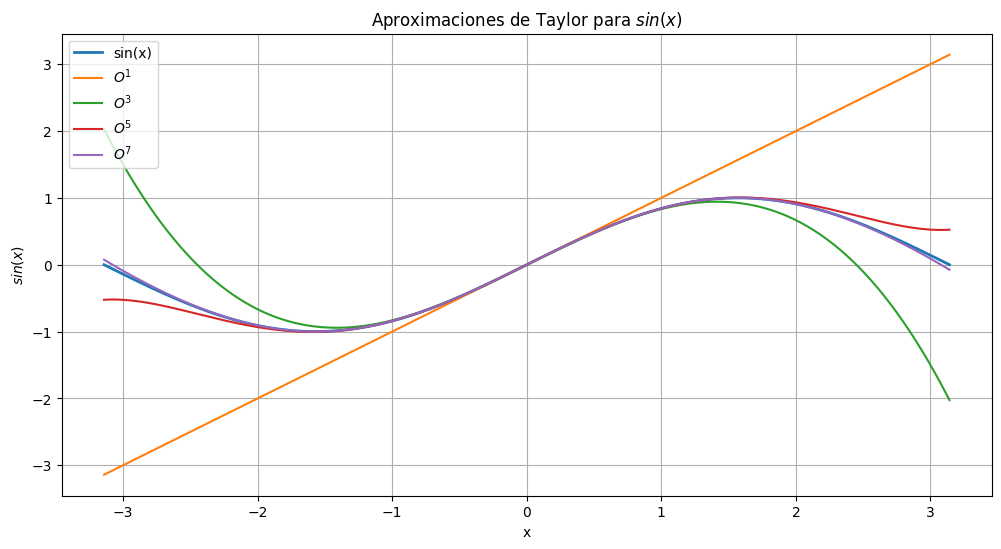

In [23]:
import numpy as np
import matplotlib.pyplot as plt
import math

def taylor_sin(x, order):
    result = 0.0
    max_m = (order) // 2  # Para términos hasta x^order (solo impares)
    for m in range(max_m + 1):
        term = ((-1)**m) * (x**(2*m + 1)) / math.factorial(2*m + 1)
        result += term
    return result

# Generar valores de x
x = np.linspace(-np.pi, np.pi, 400)
# Función original
y_sin = np.sin(x)

# Configuración de la gráfica
plt.figure(figsize=(12, 6))
plt.plot(x, y_sin, label='sin(x)', linewidth=2, scaley=True)

# Aproximaciones de Taylor de diferentes órdenes
orders = [1, 3, 5, 7]
for order in orders:
    y_taylor = np.array([taylor_sin(xi, order) for xi in x])
    #plt.plot(x, y_taylor, label=f'O {order}')
    # rewrite with latex \mathcal{x_{order} + x^
    plt.plot(x, y_taylor, label=f'$O^{({order})}$')


plt.title('Aproximaciones de Taylor para $sin(x)$')
plt.xlabel('x')
plt.ylabel('$sin(x)$')
# set the box in the left upper corner
plt.legend(loc='upper left')
plt.grid(True)
plt.show()




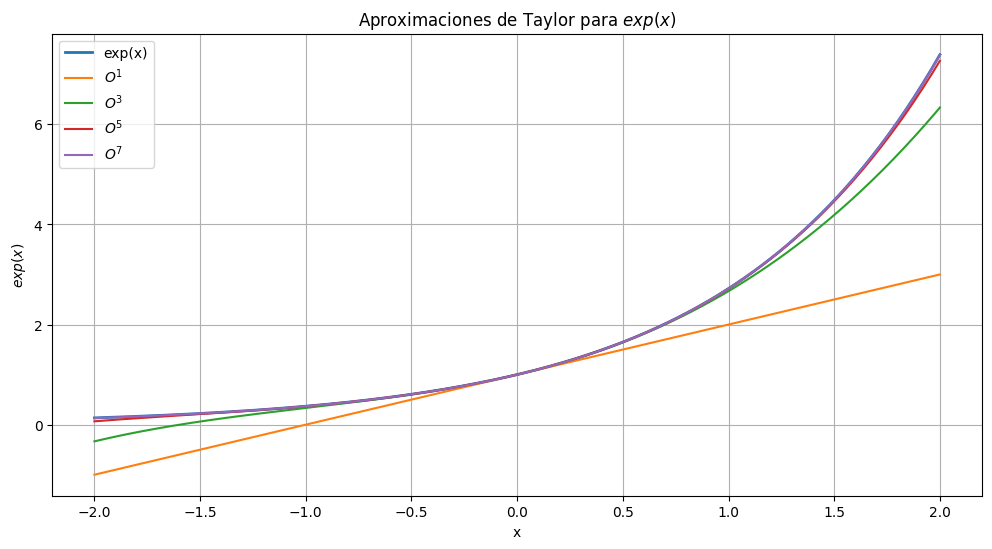

In [26]:
# Aproximación de Taylor para exp(x)
def taylor_exp(x, order):
    result = 0.0
    for m in range(order + 1):
        term = (x**m) / math.factorial(m)
        result += term
    return result

# Generar valores de x
x = np.linspace(-2, 2, 400)
# Función original
y_exp = np.exp(x)

# Configuración de la gráfica
plt.figure(figsize=(12, 6))
plt.plot(x, y_exp, label='exp(x)', linewidth=2)

# Aproximaciones de Taylor de diferentes órdenes
orders = [1, 3, 5, 7]
for order in orders:
    y_taylor = np.array([taylor_exp(xi, order) for xi in x])
    plt.plot(x, y_taylor, label=f'$O^{({order})}$')

plt.title('Aproximaciones de Taylor para $exp(x)$')
plt.xlabel('x')
plt.ylabel('$exp(x)$')
plt.legend(loc='upper left')
plt.grid(True)
plt.show()

# Parte 2

In [ ]:
# Definimos la función y su derivada
def f(x):
    return x**2- 612
def df(x):
    return 2*x
# Método de Newton
def newton_method(initial_guess, tolerance=1e-7, max_iterations=100):
    x_n = initial_guess
    for n in range(max_iterations):
        f_xn = f(x_n)
        df_xn = df(x_n)
        # Evitar división por cero
        if df_xn == 0:
            print("Derivada cero. No se puede continuar.")

            return None
        # Actualización de la aproximación
        x_n1 = x_n- f_xn / df_xn
    # Comprobamos si la aproximación es suficientemente buena
        if abs(x_n1- x_n) < tolerance:
            return x_n1
        x_n = x_n1

    print("No se alcanzó la convergencia.")
    return None

# Valor inicial
initial_guess = 20 # Aproximación inicial
# Llamamos al método de Newton
approximation = newton_method(initial_guess)
# Mostramos el resultado
print(f"La aproximación de la raíz cuadrada de 612 es: {approximation}")

La aproximación de la raíz cuadrada de 612 es: 24.73863375370596


Dada una función $f(x)$ continua y derivable, el método de Newton-Raphson se basa en la idea de aproximar la función por su tangente en un punto cercano a la raíz y usar la intersección de esta tangente con el eje $x$ como una mejor aproximación de la raíz.
La fórmula iterativa del método de Newton-Raphson es:

$$
x_{n+1} = x_n - \frac{f(x_n)}{f'(x_n)}
$$

donde:
- $x_n$ es la aproximación actual de la raíz.
- $x_{n+1}$ es la nueva aproximación de la raíz.
- $f(x_n)$ es el valor de la función en $x_n$.
- $f'(x_n)$ es el valor de la derivada de la función en $x_n$.

### Pasos del Método

1. **Elección de una aproximación inicial**: Seleccionar un valor inicial $x_0$ cercano a la raíz esperada.
2. **Cálculo de la nueva aproximación**: Usar la fórmula iterativa para calcular $x_{n+1}$.
3. **Criterio de convergencia**: Repetir el paso 2 hasta que la diferencia entre $x_{n+1}$ y $x_n$ sea menor que una tolerancia predefinida o hasta que se alcance un número máximo de iteraciones.


In [21]:
import numpy as np
def newton_raphson(f, df, x0, tol=1e-6, max_iter=20):
    """
    Método de Newton-Raphson para encontrar las raíces de la función f(x).
    Parameters:- f: Función lambda en una variable x, f(x).- df: Derivada de la función lambda f(x).- x0: Valor inicial para comenzar la iteración.- tol: Tolerancia para la convergencia (criterio de parada).- max_iter: Número máximo de iteraciones.
    Returns:- x: Raíz aproximada de la función.- iteraciones: Número de iteraciones realizadas.
    """
    x = x0
    for i in range(max_iter):
        fx = f(x)
        dfx = df(x)

        if abs(fx) < tol:
            print(f"Convergencia alcanzada en {i+1} iteraciones.")
            return x, i+1
        # Nos curamos en salud evitando divisiones por cero
        if dfx == 0:
            raise ValueError("La derivada se anuló. El método no puede␣continuar.\n")
    
        x = x- fx / dfx
    raise ValueError("No se alcanzó la convergencia después del número máximo␣de iteraciones.\n")

# Ejemplo de uso
# Define la función f(x) como una función lambda
f = lambda x: np.cos(x)- x**3
# Derivada de la función f(x)
df = lambda x:-np.sin(x)- 3*x**2
# Valor inicial para la iteración
x0 = [-1.5, 0, 0.5, 1, 2, 3, 4]
# Llamamos al método de Newton-Raphson
for x in x0:
    try:
        root, iterations = newton_raphson(f, df, x)
        print(f"Raíz encontrada en x={root} con {iterations} iteraciones␣ comenzando en x0={x}.\n")
    except ValueError as e:
        print(e)



No se alcanzó la convergencia después del número máximo␣de iteraciones.

La derivada se anuló. El método no puede␣continuar.

Convergencia alcanzada en 6 iteraciones.
Raíz encontrada en x=0.8654740331109566 con 6 iteraciones␣ comenzando en x0=0.5.

Convergencia alcanzada en 4 iteraciones.
Raíz encontrada en x=0.865474075952977 con 4 iteraciones␣ comenzando en x0=1.

Convergencia alcanzada en 6 iteraciones.
Raíz encontrada en x=0.8654740789787362 con 6 iteraciones␣ comenzando en x0=2.

Convergencia alcanzada en 7 iteraciones.
Raíz encontrada en x=0.8654740623303405 con 7 iteraciones␣ comenzando en x0=3.

Convergencia alcanzada en 8 iteraciones.
Raíz encontrada en x=0.865474033553886 con 8 iteraciones␣ comenzando en x0=4.

